In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
hotel_bookings_path = "Resources/hotel_bookings.csv"
hotel_bookings = pd.read_csv(hotel_bookings_path)
hotel_bookings_original_path = "Resources/hotel_bookings_original.csv"
hotel_bookings_original = pd.read_csv(hotel_bookings_original_path)
hotel_bookings.replace([np.inf, -np.inf], np.nan, inplace=True)
hotel_bookings_original.replace([np.inf, -np.inf], np.nan, inplace=True)

In [26]:
# Create a new column combining arrival_date_day_of_month, arrival_date_month, and arrival_date_year into a date
hotel_bookings['arrival_date'] = pd.to_datetime(hotel_bookings['arrival_date_day_of_month'].astype(str) + '-' +
                                                 hotel_bookings['arrival_date_month'] + '-' +
                                                 hotel_bookings['arrival_date_year'].astype(str),
                                                 format='%d-%B-%Y')

# Create a new DataFrame with the new 'arrival_date' column
corrected_date_hotel_bookings_df = hotel_bookings.copy()
corrected_date_hotel_bookings_df.sample(5)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,arrival_date,day_of_week
27361,63930,City Hotel,1,134,2017,February,8,25,0,1,...,0,Transient-Party,75.00,0,0,No-Show,25-02-17,2,2017-02-25,Saturday
14762,29851,Resort Hotel,0,31,2016,November,45,4,1,2,...,0,Transient,84.80,0,2,Check-Out,7/11/2016,11,2016-11-04,Friday
2055,6104,Resort Hotel,0,224,2016,May,22,25,1,4,...,0,Transient-Party,66.00,0,0,Check-Out,30-05-16,5,2016-05-25,Wednesday
52539,110522,City Hotel,0,123,2017,April,17,24,1,3,...,0,Transient,105.75,0,1,Check-Out,28-04-17,4,2017-04-24,Monday
19121,34709,Resort Hotel,0,11,2017,March,13,31,0,2,...,0,Transient,60.00,0,0,Check-Out,2/4/2017,3,2017-03-31,Friday


In [27]:
#Seeing all the columns in the dataframe
column_headings = corrected_date_hotel_bookings_df.columns.tolist()
print(column_headings)

['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'month_num', 'arrival_date', 'day_of_week']


In [28]:
#Adding number of nights column
corrected_date_hotel_bookings_df['total_nights'] = corrected_date_hotel_bookings_df['stays_in_weekend_nights'] + corrected_date_hotel_bookings_df['stays_in_week_nights']
bookings_with_total_nights_df = corrected_date_hotel_bookings_df[['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'month_num', 'arrival_date', 'day_of_week', 'total_nights']]
bookings_with_total_nights_df.sample(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,arrival_date,day_of_week,total_nights
15786,31002,Resort Hotel,0,3,2016,December,50,8,0,3,...,Transient,110.00,0,0,Check-Out,11/12/2016,12,2016-12-08,Thursday,3
27782,77301,City Hotel,0,256,2015,September,38,14,1,2,...,Transient-Party,64.33,0,0,Check-Out,17-09-15,9,2015-09-14,Monday,3
20542,36427,Resort Hotel,0,13,2017,May,20,14,2,5,...,Transient,68.40,0,1,Check-Out,21-05-17,5,2017-05-14,Sunday,7
26652,50559,City Hotel,0,123,2016,May,19,4,0,4,...,Transient,71.60,0,0,Check-Out,8/5/2016,5,2016-05-04,Wednesday,4
29943,81074,City Hotel,0,5,2016,July,29,10,2,0,...,Transient,65.00,0,0,Check-Out,12/7/2016,7,2016-07-10,Sunday,2
9802,23973,Resort Hotel,0,29,2016,May,19,6,1,2,...,Transient,92.00,0,1,Check-Out,9/5/2016,5,2016-05-06,Friday,3
1415,4152,Resort Hotel,0,150,2016,February,8,19,2,5,...,Transient,22.50,0,0,Check-Out,26-02-16,2,2016-02-19,Friday,7
19988,35773,Resort Hotel,0,11,2017,April,17,28,1,2,...,Transient,121.00,0,1,Check-Out,1/5/2017,4,2017-04-28,Friday,3
52634,110657,City Hotel,0,299,2017,April,17,27,0,3,...,Transient,109.80,0,1,Check-Out,30-04-17,4,2017-04-27,Thursday,3
40498,95005,City Hotel,0,7,2016,August,33,11,0,2,...,Transient,148.00,0,0,Check-Out,13-08-16,8,2016-08-11,Thursday,2


In [29]:
#Adding Revenue column
bookings_with_total_nights_df['total_revenue'] = bookings_with_total_nights_df['adr'] * bookings_with_total_nights_df['total_nights']
df_with_revenue = bookings_with_total_nights_df[['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date', 'month_num', 'arrival_date', 'day_of_week', 'total_nights','total_revenue']]
df_with_revenue.sample(5)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,arrival_date,day_of_week,total_nights,total_revenue
15151,30311,Resort Hotel,0,9,2016,November,46,12,2,5,...,82.51,1,1,Check-Out,19-11-16,11,2016-11-12,Saturday,7,577.57
23847,42718,City Hotel,0,69,2015,September,37,9,0,2,...,62.00,0,0,Check-Out,11/9/2015,9,2015-09-09,Wednesday,2,124.00
7382,21316,Resort Hotel,0,0,2016,February,9,25,0,1,...,40.00,1,0,Check-Out,26-02-16,2,2016-02-25,Thursday,1,40.00
51581,109266,City Hotel,0,75,2017,April,14,5,0,4,...,85.00,0,0,Check-Out,9/4/2017,4,2017-04-05,Wednesday,4,340.00
45475,101199,City Hotel,0,15,2016,November,46,8,0,1,...,142.64,0,1,Check-Out,9/11/2016,11,2016-11-08,Tuesday,1,142.64


In [30]:
total_revenue_made_for_both_hotels = df_with_revenue["total_revenue"].sum()
total_revenue_made_for_both_hotels

19647981.99

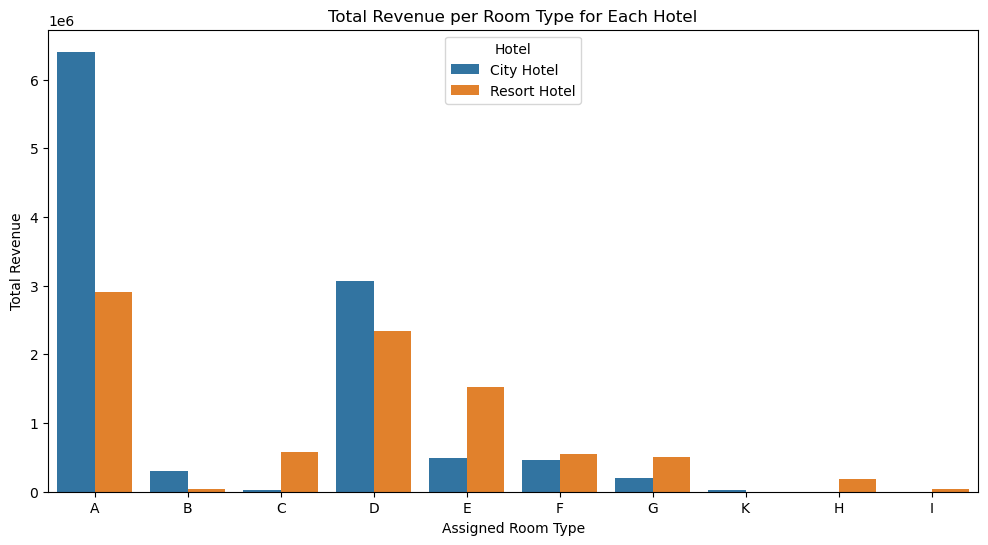

In [31]:
# Calculate the total revenue per room type for each hotel
hotel_room_revenue = df_with_revenue.groupby(['hotel', 'assigned_room_type']).agg({'total_revenue': 'sum'}).reset_index()

# Rename columns for clarity
hotel_room_revenue.columns = ['Hotel', 'Assigned Room Type', 'Total Revenue']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the bar chart
sns.barplot(data=hotel_room_revenue, x='Assigned Room Type', y='Total Revenue', hue='Hotel')

# Set the title and labels
plt.title('Total Revenue per Room Type for Each Hotel')
plt.xlabel('Assigned Room Type')
plt.ylabel('Total Revenue')

# Display the bar chart
plt.show()

In [32]:
#creating a df with only city hotels
city_hotel_df = df_with_revenue[df_with_revenue['hotel'] == 'City Hotel']
city_hotel_df.sample(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,arrival_date,day_of_week,total_nights,total_revenue
50095,107378,City Hotel,0,33,2017,March,10,10,0,2,...,168.00,0,0,Check-Out,12/3/2017,3,2017-03-10,Friday,2,336.0
47862,104425,City Hotel,0,11,2017,January,2,9,1,4,...,123.68,0,1,Check-Out,14-01-17,1,2017-01-09,Monday,5,618.4
38030,91986,City Hotel,0,13,2016,June,27,28,0,1,...,119.00,0,1,Check-Out,29-06-16,6,2016-06-28,Tuesday,1,119.0
27667,77068,City Hotel,0,219,2015,September,36,4,0,1,...,108.00,0,0,Check-Out,5/9/2015,9,2015-09-04,Friday,1,108.0
28589,78614,City Hotel,0,1,2015,October,41,9,2,2,...,145.00,0,2,Check-Out,13-10-15,10,2015-10-09,Friday,4,580.0
28187,78021,City Hotel,0,1,2016,February,6,3,0,1,...,65.00,0,1,Check-Out,4/2/2016,2,2016-02-03,Wednesday,1,65.0
58674,118562,City Hotel,0,211,2017,August,33,19,2,1,...,174.20,1,0,Check-Out,22-08-17,8,2017-08-19,Saturday,3,522.6
55864,114902,City Hotel,0,26,2017,June,26,26,1,1,...,269.50,0,1,Check-Out,28-06-17,6,2017-06-26,Monday,2,539.0
29894,80933,City Hotel,0,4,2015,November,48,27,0,2,...,62.00,0,0,Check-Out,29-11-15,11,2015-11-27,Friday,2,124.0
51963,109765,City Hotel,0,98,2017,April,15,14,1,2,...,90.10,0,0,Check-Out,17-04-17,4,2017-04-14,Friday,3,270.3


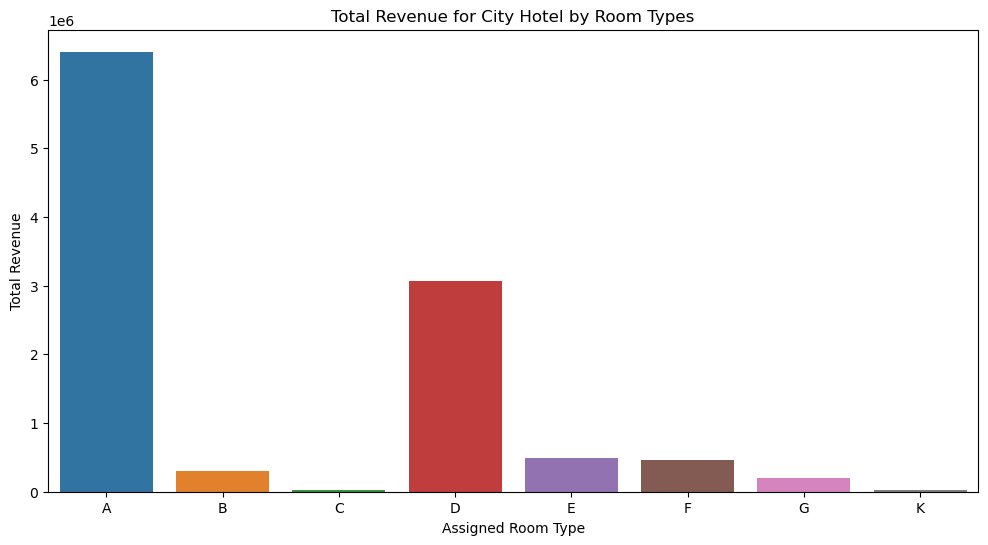

In [44]:
# Calculate the total revenue per room type for city hotel
city_hotel_room_revenue = city_hotel_df.groupby(['assigned_room_type']).agg({'total_revenue': 'sum'}).reset_index()

# Rename columns for clarity
city_hotel_room_revenue.columns = ['assigned Room Type', 'total Revenue']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the bar chart
sns.barplot(data=city_hotel_room_revenue, x='assigned Room Type', y='total Revenue')

# Set the title and labels
plt.title('Total Revenue for City Hotel by Room Types')
plt.xlabel('Assigned Room Type')
plt.ylabel('Total Revenue')

# Display the bar chart
plt.show()

In [34]:
Resort_hotel_df = df_with_revenue[df_with_revenue['hotel'] == 'Resort Hotel']
Resort_hotel_df.sample(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month_num,arrival_date,day_of_week,total_nights,total_revenue
11167,25542,Resort Hotel,0,3,2016,June,27,30,0,2,...,156.00,1,1,Check-Out,2/7/2016,6,2016-06-30,Thursday,2,312.00
15177,30342,Resort Hotel,0,43,2016,November,47,18,0,2,...,52.50,0,0,Check-Out,20-11-16,11,2016-11-18,Friday,2,105.00
1515,4567,Resort Hotel,0,162,2016,March,13,24,0,3,...,84.00,0,0,Check-Out,27-03-16,3,2016-03-24,Thursday,3,252.00
20224,36061,Resort Hotel,0,79,2017,May,18,6,1,1,...,85.00,0,2,Check-Out,8/5/2017,5,2017-05-06,Saturday,2,170.00
3500,16831,Resort Hotel,0,252,2015,September,37,10,1,3,...,55.68,0,2,Check-Out,14-09-15,9,2015-09-10,Thursday,4,222.72
20872,36827,Resort Hotel,0,1,2017,May,22,28,2,0,...,127.00,1,2,Check-Out,30-05-17,5,2017-05-28,Sunday,2,254.00
19982,35767,Resort Hotel,0,10,2017,April,17,29,1,1,...,121.00,0,1,Check-Out,1/5/2017,4,2017-04-29,Saturday,2,242.00
2226,6689,Resort Hotel,0,310,2016,June,26,24,4,10,...,85.30,0,0,Check-Out,8/7/2016,6,2016-06-24,Friday,14,1194.20
6199,20039,Resort Hotel,0,5,2016,January,3,13,0,2,...,49.00,1,0,Check-Out,15-01-16,1,2016-01-13,Wednesday,2,98.00
12534,27196,Resort Hotel,0,48,2016,August,34,20,1,1,...,206.00,0,1,Check-Out,22-08-16,8,2016-08-20,Saturday,2,412.00


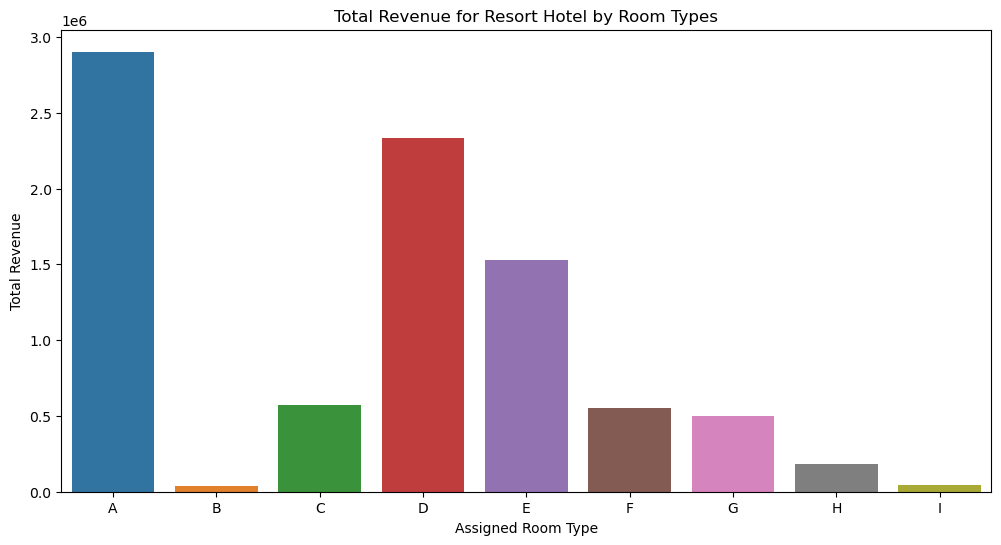

In [45]:
# Calculate the total revenue per room type for resort hotel
Resort_hotel_room_revenue = Resort_hotel_df.groupby(['assigned_room_type']).agg({'total_revenue': 'sum'}).reset_index()

# Rename columns for clarity
Resort_hotel_room_revenue.columns = ['assigned Room Type', 'total Revenue']

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the bar chart
sns.barplot(data=Resort_hotel_room_revenue, x='assigned Room Type', y='total Revenue')

# Set the title and labels
plt.title('Total Revenue for Resort Hotel by Room Types')
plt.xlabel('Assigned Room Type')
plt.ylabel('Total Revenue')

# Display the bar chart
plt.show()

In [36]:
# finding the percentage of booking cancelled
# Filter out canceled bookings
canceled_bookings = hotel_bookings_original[hotel_bookings_original['is_canceled'] == 1]

# Calculate the total number of canceled bookings
total_canceled = len(canceled_bookings)

# Calculate the number of canceled bookings for each deposit type
canceled_deposit_counts = canceled_bookings['deposit_type'].value_counts()

# Calculate the percentage of "Refundable" and "No Deposit" canceled bookings
refundable_percentage = (canceled_deposit_counts.get('Refundable', 0) / total_canceled) * 100
no_deposit_percentage = (canceled_deposit_counts.get('No Deposit', 0) / total_canceled) * 100
non_refund_percentage = (canceled_deposit_counts.get('Non Refund', 0) / total_canceled) * 100

# Print the results
print(f"Total Canceled Bookings: {total_canceled}")
print(f"Refundable Canceled Bookings: {refundable_percentage:.2f}%")
print(f"No Deposit Canceled Bookings: {no_deposit_percentage:.2f}%")
print(f"Non Refund Canceled Bookings: {non_refund_percentage:.2f}%")

Total Canceled Bookings: 44224
Refundable Canceled Bookings: 0.08%
No Deposit Canceled Bookings: 67.14%
Non Refund Canceled Bookings: 32.77%


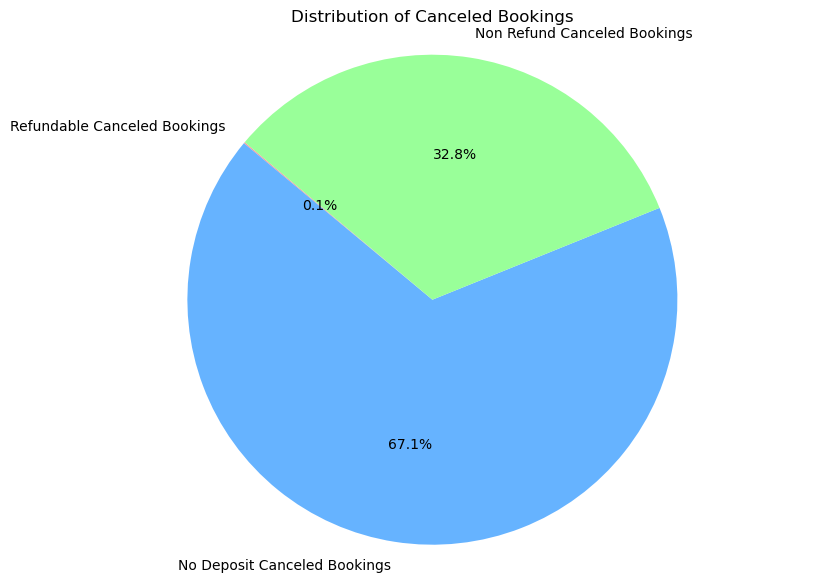

In [37]:


# Given data
total_canceled_bookings = 44224
refundable_percentage = 0.08
no_deposit_percentage = 67.14
non_refund_percentage = 32.77

# Calculate the number of bookings for each category
refundable_canceled_bookings = total_canceled_bookings * (refundable_percentage / 100)
no_deposit_canceled_bookings = total_canceled_bookings * (no_deposit_percentage / 100)
non_refund_canceled_bookings = total_canceled_bookings * (non_refund_percentage / 100)

# Data for the pie chart
labels = ['Refundable Canceled Bookings', 'No Deposit Canceled Bookings', 'Non Refund Canceled Bookings']
sizes = [refundable_canceled_bookings, no_deposit_canceled_bookings, non_refund_canceled_bookings]

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribution of Canceled Bookings')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


In [38]:
Resort_hotel_df.to_csv('Resort_hotel_df_data.csv')
city_hotel_df.to_csv('city_hotel_df_data.csv')

City Hotel Room Type Year by Year Growth

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


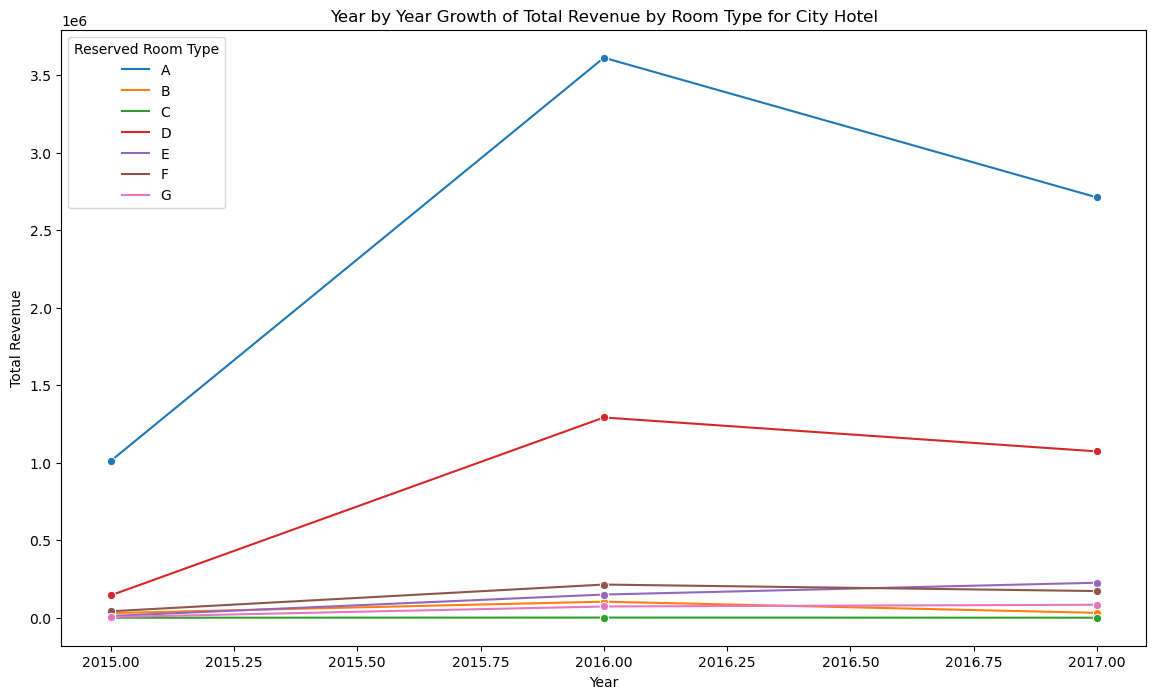

In [46]:
# Group by arrival_date_year and reserved_room_type and calculate the total revenue
grouped_data = city_hotel_df.groupby(['arrival_date_year', 'reserved_room_type']).agg({'total_revenue': 'sum'}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['Year', 'Reserved Room Type', 'Total Revenue']

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create the line chart
sns.lineplot(data=grouped_data, x='Year', y='Total Revenue', hue='Reserved Room Type', marker='o')

# Set the title and labels
plt.title('Year by Year Growth of Total Revenue by Room Type for City Hotel')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

# Display the line chart
plt.show()

Resort Hotel Room Type Year by Year Growth

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


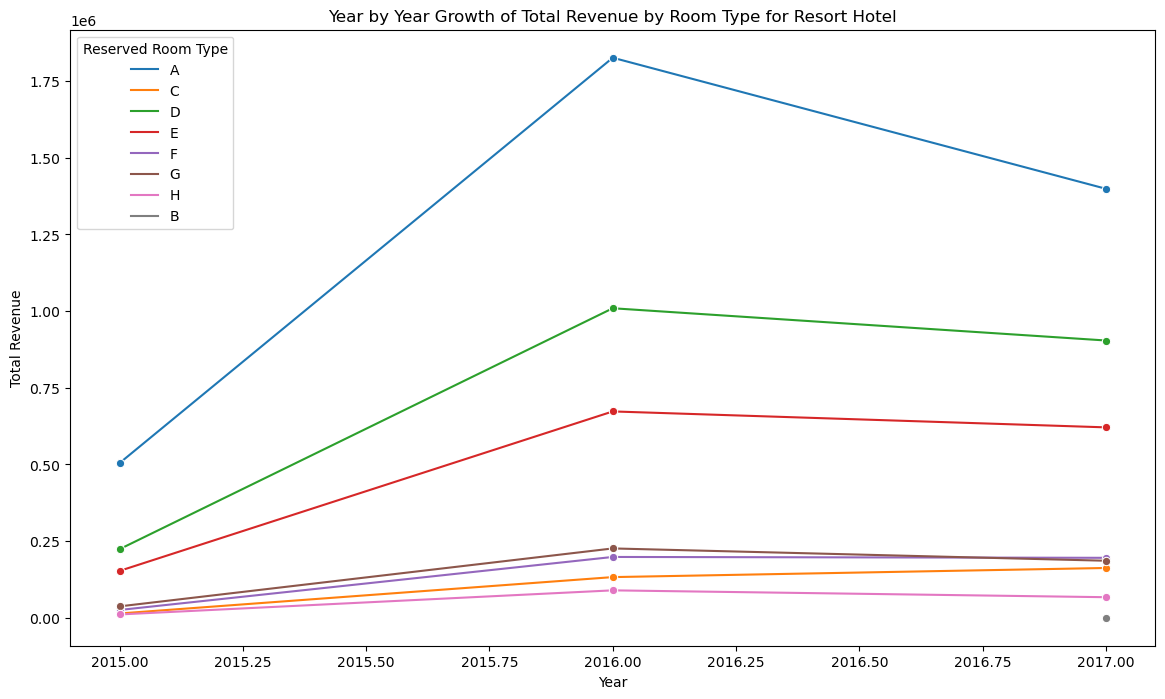

In [47]:
# Group by arrival_date_year and reserved_room_type and calculate the total revenue
grouped_data = Resort_hotel_df.groupby(['arrival_date_year', 'reserved_room_type']).agg({'total_revenue': 'sum'}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['Year', 'Reserved Room Type', 'Total Revenue']

# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create the line chart
sns.lineplot(data=grouped_data, x='Year', y='Total Revenue', hue='Reserved Room Type', marker='o')

# Set the title and labels
plt.title('Year by Year Growth of Total Revenue by Room Type for Resort Hotel')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

# Display the line chart
plt.show()

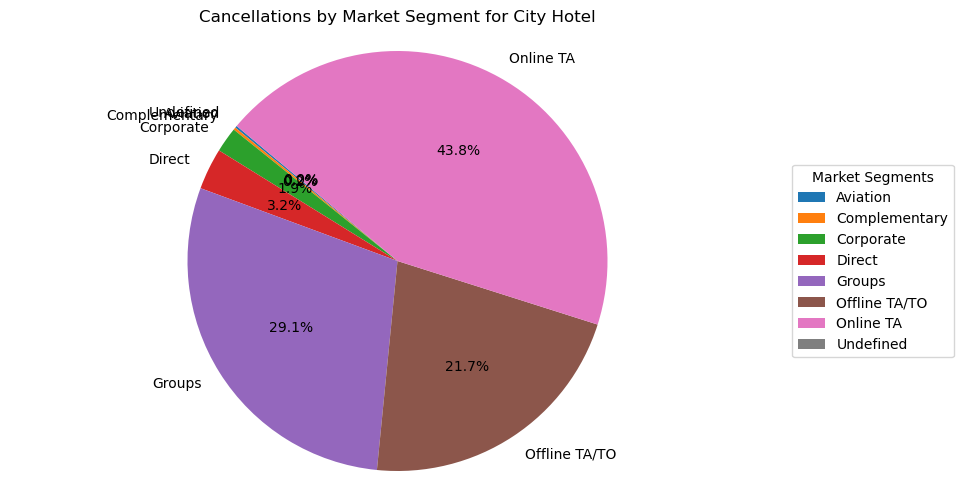

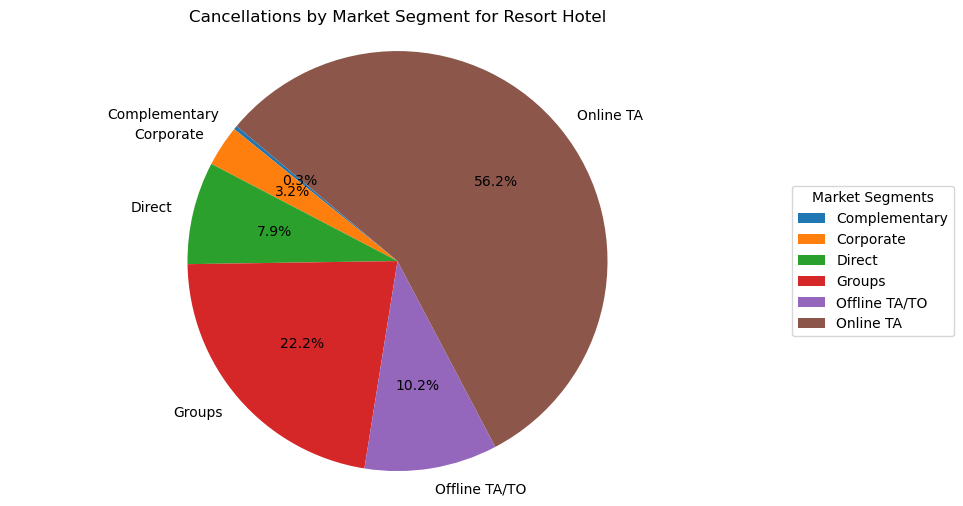

In [49]:
# Group by market_segment and hotel and calculate the number of cancellations
cancellations_data_city_and_resort = hotel_bookings_original[hotel_bookings_original['is_canceled'] == 1].groupby(['market_segment', 'hotel']).size().reset_index(name='cancellations')

# Create a pie chart for each hotel
hotels = cancellations_data_city_and_resort['hotel'].unique()

for hotel in hotels:
    hotel_cancellations = cancellations_data_city_and_resort[cancellations_data_city_and_resort['hotel'] == hotel]
    
    plt.figure(figsize=(10, 6))
    plt.pie(hotel_cancellations['cancellations'], labels=hotel_cancellations['market_segment'], autopct='%1.1f%%', startangle=140)
    plt.legend(hotel_cancellations['market_segment'], title="Market Segments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(f'Cancellations by Market Segment for {hotel}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


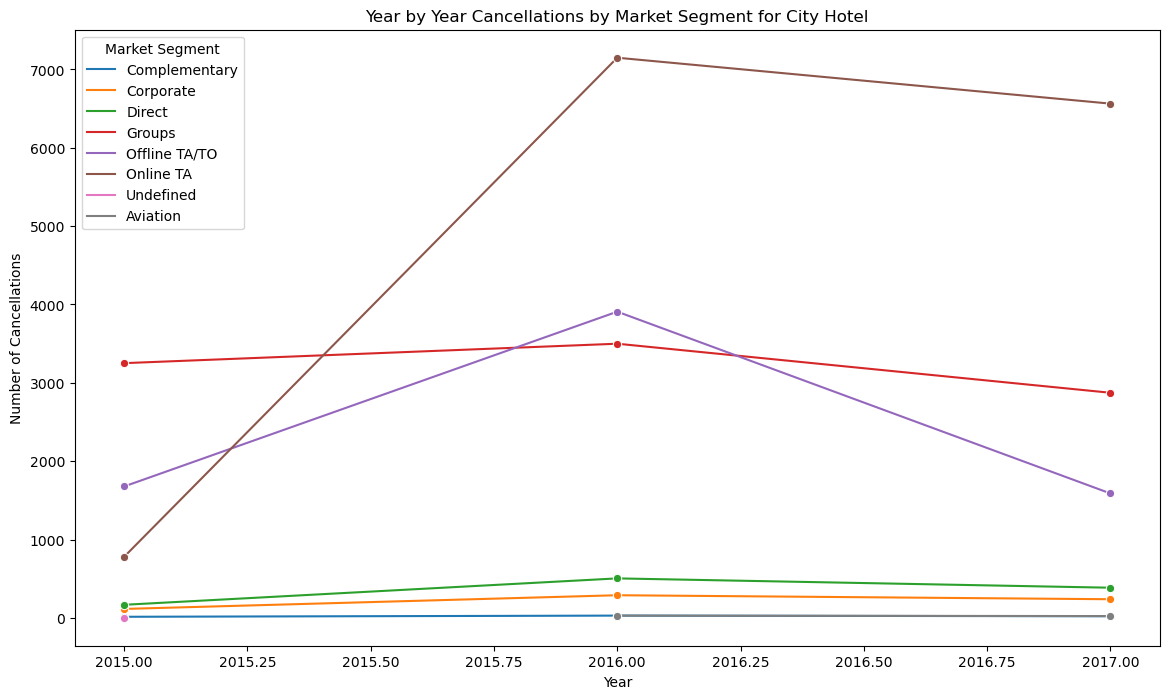

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


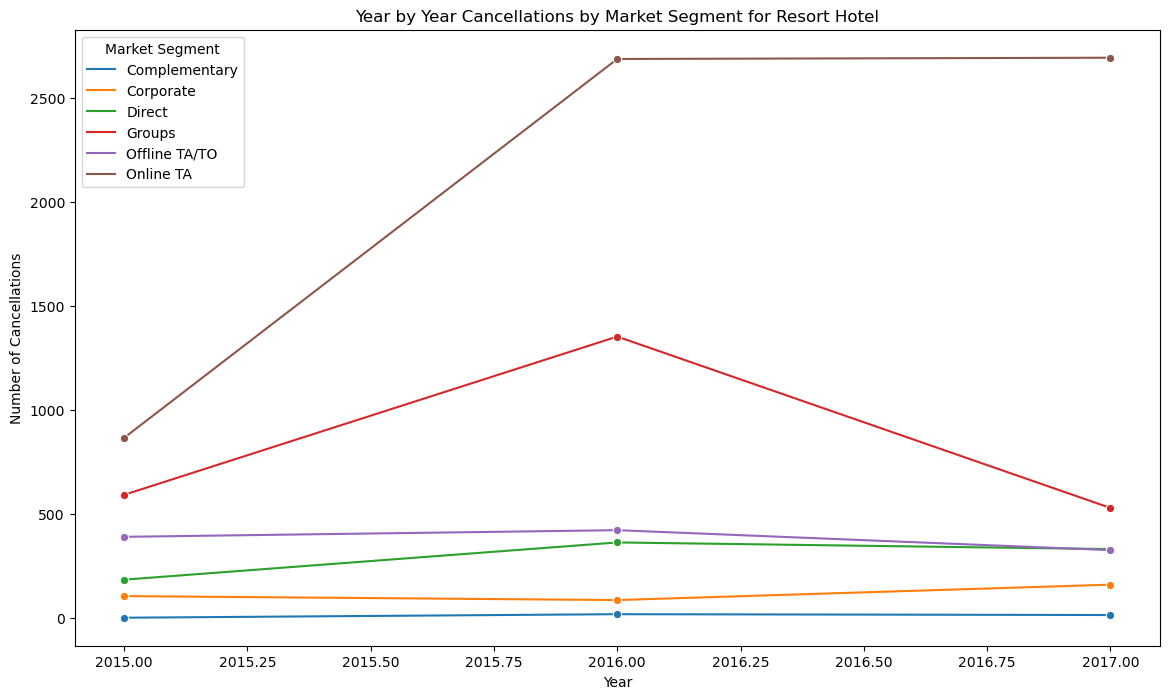

In [42]:
# Filter data for cancellations only
cancellations_data = hotel_bookings_original[hotel_bookings_original['is_canceled'] == 1]

# Group by arrival_date_year, market_segment, and hotel and calculate the number of cancellations
cancellations_grouped = cancellations_data.groupby(['arrival_date_year', 'market_segment', 'hotel']).size().reset_index(name='cancellations')

# Plot the data
hotels = cancellations_grouped['hotel'].unique()

for hotel in hotels:
    hotel_cancellations = cancellations_grouped[cancellations_grouped['hotel'] == hotel]
    
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=hotel_cancellations, x='arrival_date_year', y='cancellations', hue='market_segment', marker='o')
    
    plt.title(f'Year by Year Cancellations by Market Segment for {hotel}')
    plt.xlabel('Year')
    plt.ylabel('Number of Cancellations')
    plt.legend(title='Market Segment')
    plt.show()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


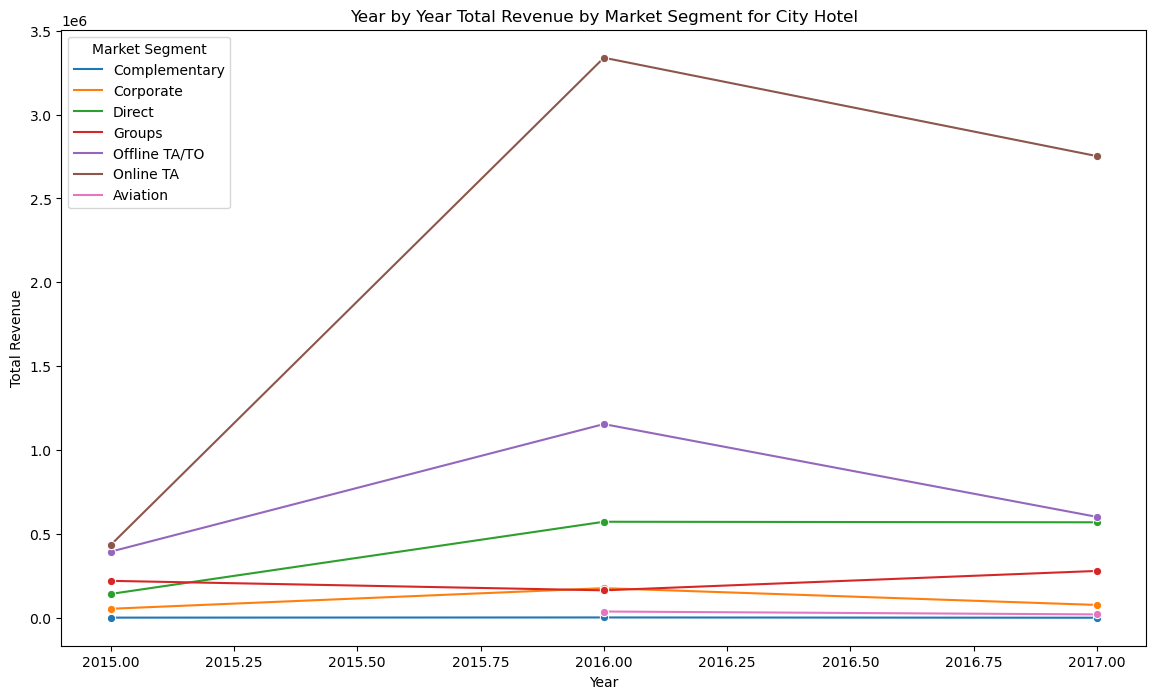

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


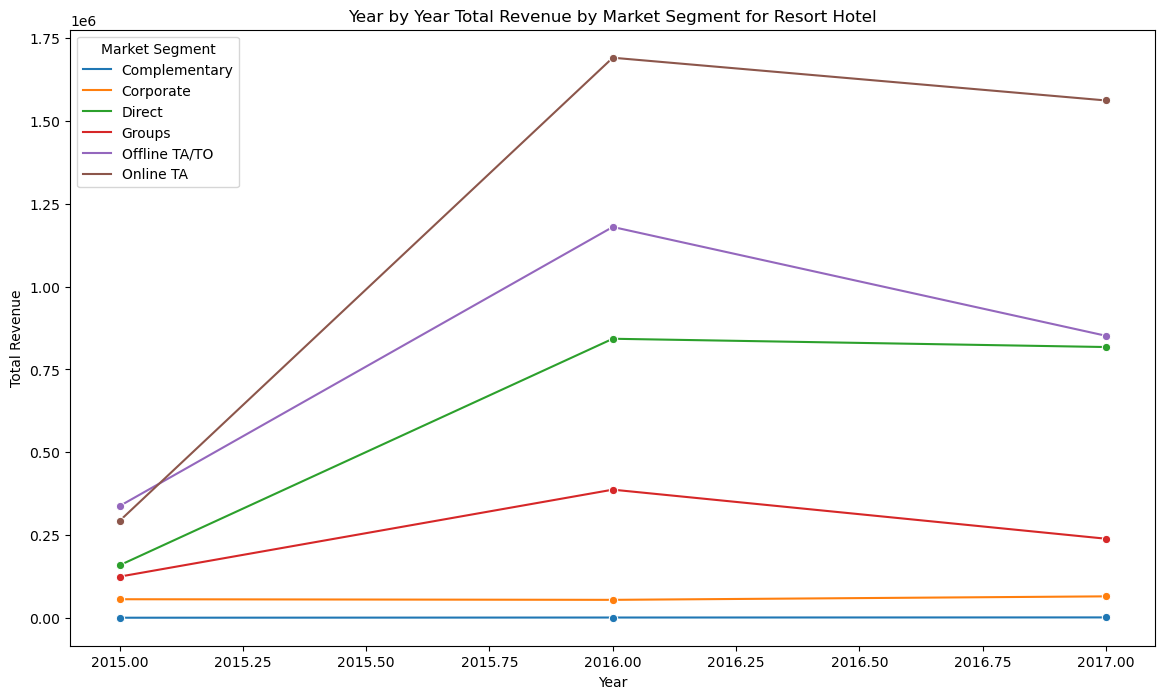

In [43]:
# Group by arrival_date_year, market_segment, and hotel and calculate the total revenue
revenue_grouped_market_segment= df_with_revenue.groupby(['arrival_date_year', 'market_segment', 'hotel']).agg({'total_revenue': 'sum'}).reset_index()

# Plot the data
hotels = revenue_grouped_market_segment['hotel'].unique()

for hotel in hotels:
    hotel_revenue = revenue_grouped_market_segment[revenue_grouped_market_segment['hotel'] == hotel]
    
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=hotel_revenue, x='arrival_date_year', y='total_revenue', hue='market_segment', marker='o')
    
    plt.title(f'Year by Year Total Revenue by Market Segment for {hotel}')
    plt.xlabel('Year')
    plt.ylabel('Total Revenue')
    plt.legend(title='Market Segment')
    plt.show()